<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Descendants-from-head-notebook" data-toc-modified-id="Descendants-from-head-notebook-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Descendants from head notebook</a></span></li><li><span><a href="#Two-factors-effect" data-toc-modified-id="Two-factors-effect-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Two factors effect</a></span><ul class="toc-item"><li><span><a href="#$r_p$-&amp;-$K_p$" data-toc-modified-id="$r_p$-&amp;-$K_p$-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>$r_p$ &amp; $K_p$</a></span></li></ul></li></ul></div>

# Descendants from head notebook

In [3]:
using RCall, PyCall, Plots, ProgressMeter, DataFrames
mt = pyimport("math") #??
sc = pyimport("scipy")
itg = pyimport("scipy.integrate")

function ebc_LVc(pops, t, rp, rq, Jp, Jq, Kp, Kq, Tp, Tq, Tk)
    
    p = pops[:1]
    q = pops[:2]
    
    hpq = (Jq-Tk*Tq)*q/(Jp*p+Jq*q-Tk*(Tp*p+Tq*q))
    hqp = (Jp-Tk*Tp)*p/(Jp*p+Jq*q-Tk*(Tp*p+Tq*q))
    
    dpdt = rp*p*(1-(p+hpq*q)/Kp)
    dqdt = rq*q*(1-(q+hqp*p)/Kq)

    return (dpdt, dqdt)
end

ebc_LVc (generic function with 1 method)

# Two factors effect

First graph: same trend - factors increase / decrease together  
Second graph: opposite trend - one factor increase, the other decrease

## $r_p$ & $K_p$

┌ Info: Saved animation to 
│   fn = /Volumes/HPM-000/Academic/Masters/ICL_CMEE/Project/meeting/simResult/sim_rkP.gif
└ @ Plots /Users/Ho_Pok_Man/.julia/packages/Plots/qZHsp/src/animation.jl:98


Plots.AnimatedGif("/Volumes/HPM-000/Academic/Masters/ICL_CMEE/Project/meeting/simResult/sim_rkP.gif")
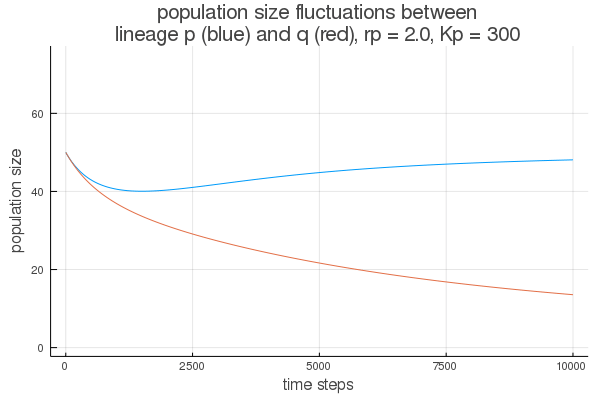

In [4]:
t=sc.linspace(0,7,10000)

## default parameters
rp = rq = 1
Kp = Kq = 200
Jp = Jq = 50
Tp = Tq = 10
Tk = 10

test1=[2, 1.5, 1.3, 1.1, 1.05, .95, .8, .6, .4, .05]
test2=[300, 250, 220, 210, 205, 195, 190, 180, 150, 100]
aa = @animate for i in 1:length(test1)
    rp = test1[i]
    Kp = test2[i]
    
    pops = sc.array([50,50]) # unknown reason can't put it out of loop
    pops, infodict = itg.odeint(ebc_LVc, pops, t, full_output=true, args=(rp, rq, Kp, Kq, Jp, Jq, Tp, Tq, Tk))
    
    plot(pops, xlabel="time steps", ylabel="population size", title="population size fluctuations between\nlineage p (blue) and q (red), rp = "*string(test1[i])*", Kp = "*string(test2[i]), label="", ylim=[0, 75])

end
gif(aa, "simResult/sim_rkP.gif", fps=1)

┌ Info: Saved animation to 
│   fn = /Volumes/HPM-000/Academic/Masters/ICL_CMEE/Project/meeting/simResult/sim_rkN.gif
└ @ Plots /Users/Ho_Pok_Man/.julia/packages/Plots/qZHsp/src/animation.jl:98


Plots.AnimatedGif("/Volumes/HPM-000/Academic/Masters/ICL_CMEE/Project/meeting/simResult/sim_rkN.gif")
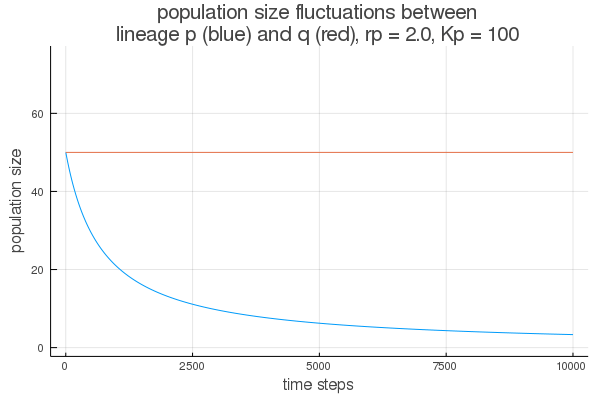

In [5]:
t=sc.linspace(0,7,10000)

## default parameters
rp = rq = 1
Kp = Kq = 200
Jp = Jq = 50
Tp = Tq = 10
Tk = 10

test1=[2, 1.5, 1.3, 1.1, 1.05, .95, .8, .6, .4, .05]
test2=[100, 150, 180, 190, 195, 205, 210, 220, 250, 300]
aa = @animate for i in 1:length(test1)
    rp = test1[i]
    Kp = test2[i]
    
    pops = sc.array([50,50]) # unknown reason can't put it out of loop
    pops, infodict = itg.odeint(ebc_LVc, pops, t, full_output=true, args=(rp, rq, Kp, Kq, Jp, Jq, Tp, Tq, Tk))
    
    plot(pops, xlabel="time steps", ylabel="population size", title="population size fluctuations between\nlineage p (blue) and q (red), rp = "*string(test1[i])*", Kp = "*string(test2[i]), label="", ylim=[0, 75])

end
gif(aa, "simResult/sim_rkN.gif", fps=1)